<a href="https://colab.research.google.com/github/ahmetbekir22/Tuberculosis-Classification-Densnet121/blob/main/Tuberculosis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os
import zipfile

-os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset


Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors


In [ ]:
with zipfile.ZipFile("tuberculosis-tb-chest-xray-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("tb_dataset")


In [ ]:
import os

for root, dirs, files in os.walk("tb_dataset"):
    print(f"{root}: {len(files)} files")


tb_dataset: 0 files
tb_dataset/TB_Chest_Radiography_Database: 3 files
tb_dataset/TB_Chest_Radiography_Database/Normal: 3500 files
tb_dataset/TB_Chest_Radiography_Database/Tuberculosis: 700 files


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'tb_dataset/TB_Chest_Radiography_Database',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'tb_dataset/TB_Chest_Radiography_Database',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 484ms/step - accuracy: 0.8969 - loss: 0.2525 - val_accuracy: 0.9464 - val_loss: 0.1087
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 294ms/step - accuracy: 0.9757 - loss: 0.0785 - val_accuracy: 0.9845 - val_loss: 0.0600
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 304ms/step - accuracy: 0.9822 - loss: 0.0502 - val_accuracy: 0.9726 - val_loss: 0.0623
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 301ms/step - accuracy: 0.9826 - loss: 0.0489 - val_accuracy: 0.9500 - val_loss: 0.1193
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 33s 314ms/step - accuracy: 0.9896 - loss: 0.0328 - val_accuracy: 0.9548 - val_loss: 0.1117
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 302ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9845 - val_loss: 0.0494
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 301ms/step - accuracy: 0.9890 - loss: 0.0315 - val_accuracy: 0.9726 - val_loss: 0.0649
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 296ms/step - accuracy: 0.9889 - loss: 0

27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 579ms/step
              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99       700
Tuberculosis       0.97      0.97      0.97       140

    accuracy                           0.99       840
   macro avg       0.98      0.98      0.98       840
weighted avg       0.99      0.99      0.99       840



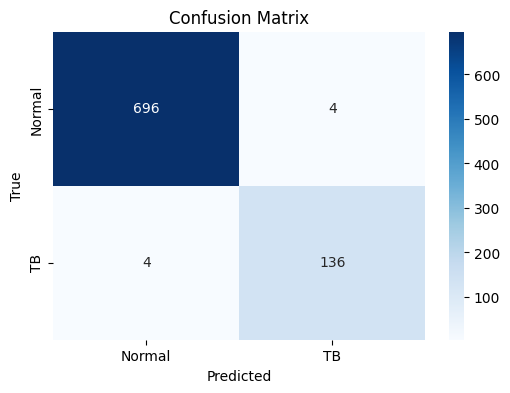

In [ ]:
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int).flatten()
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=['Normal', 'Tuberculosis']))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'TB'], yticklabels=['Normal', 'TB'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
